In [1]:
class Models:
    def __init__(self,β:float,γ:float,rent:float,y1:float,y2:float,y3:float,na:int,a_max:float,a_min:float,grid_a:"np.ndarray[np.float64]"):
        # パラメータ
        self.β = β # 割引因子
        self.γ = γ # 相対的危険回避度

        # 要素価格
        self.rent = rent # 純利子率

        # 労働所得
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3

        # グリッド
        self.na = na # 貯蓄グリッドの数
        self.a_max = a_max # 貯蓄グリッドの最大値
        self.a_min = a_min # 貯蓄グリッドの最小値 
        self.grid_a = grid_a # 貯蓄グリッド

In [2]:
def Calibration():
    # パラメータはここで設定をする
    β = 0.985**20
    γ = 2.0
    rent = 1.025**20 - 1.0
    y1 = 1.0
    y2 = 1.2
    y3 = 0.4
    na = 21
    a_max = 2.0
    a_min = 0.0

    grid_a = np.linspace(a_min,a_max,na)

    return Models(β, γ, rent, y1, y2, y3, na, a_max, a_min, grid_a)

In [3]:
def mu_CRRA(cons,γ):
    return cons**(-γ)

In [4]:
# 使う関数を呼び出す
import numpy as np # 配列を扱うためのパッケージ
import matplotlib.pyplot as plt # プロットを行うためのパッケージ
import japanize_matplotlib # プロットで日本語を使うためのパッケージ
from scipy import optimize # Python上の Optimization Tool
from scipy import interpolate # Python上の Interpolation Tool

## 3期間モデルと近似

- これまで、数値計算的な発想をいくつか紹介してきた。残りの2節では、モデルを3期間に拡張することによって必要になる新たな知識を紹介しよう。
　
 
### 3期間モデル


- 前節までの消費・貯蓄モデルにおける経済主体の生存期間を1期間だけ延長しよう。生涯効用関数は3期目を加えて、

$$
  U(c_{1},c_{2},c_{3}) = \frac{c_{1}^{1-\gamma}}{1-\gamma} + \beta \frac{c_{2}^{1-\gamma}}{1-\gamma} + \beta^{2} \frac{c_{3}^{1-\gamma}}{1-\gamma}
$$

とする。

- 予算制約も以下のように書き換える。
$$
  c_{1} + a_{2} = y_{1} + a_{1} \\
  c_{2} + a_{3} = y_{2} + (1+r)a_{2} \\
  c_{3} = y_{3} + (1+r)a_{3} \\
$$
若年期と中年期はそれぞれ$y_{1}$と$y_{2}$の労働所得を得ることができ、引退した後は$y_{3}$の年金を受け取るとしよう。また、この個人は（遺産などにより）$a_{1}$だけの資産を保有しているとする。


- 3期間になったので、意思決定も若年期と中年期にそれぞれどれだけ消費・貯蓄を行うかという問題をそれぞれ解くことになる。

- この消費者は下記の一階条件を満たすように1期目と2期目の消費と貯蓄を決定する。

$$
  c_{1}^{-\gamma} = \beta (1+r) c_{2}^{-\gamma} \\
  c_{2}^{-\gamma} = \beta (1+r) c_{3}^{-\gamma}
$$


- バックワード・インダクション(backward induction)を用いて、老年期から後ろ向きに解いていく。

- 2期間モデルと比較して、数値計算の側面で、何が変わったのであろうか？


- 2期目から3期目にかけての消費者問題はほぼこれまで通り、下記のオイラー方程式を解けばよい。

$$
  u'(y_{2}+(1+r)a_{2,i}-a_{3}) = \beta (1+r) u'(y_{3}+(1+r)a_{3}) \tag{1}
$$


- $a_{2}$を離散個のグリッドで近似して、その状態変数上で貯蓄$a_{3}$を探せばよい。前節までで紹介したいずれの方法を使っても、グリッド上の貯蓄関数$a_{3}=g(a_{2,i})$を得ることができる。

- 1期目から2期目にかけては、オイラー方程式は、

$$
  u'(y_{1}+a_{1,i}-a_{2}) = \beta (1+r) u'(y_{2}+(1+r)a_{2}-a_{3}) \\
  = \beta (1+r) u'(y_{2}+(1+r)a_{2}-g(a_{2}))
$$

である。ここで、2期目の真の貯蓄関数$a_{3}=g(a_{2})$を我々は知らない。知っているのは、グリッド$a_{2,i}$とその上の貯蓄水準$a_{3,i}$の組み合わせだけである。


- 1期目の貯蓄関数を計算するさい、$a_{2}$は連続的に変化する。もし真の解がグリッド$a_{2,i}$と$a_{2,i+1}$の間にある場合、$g(a_{2})$をどのように計算すればよいのだろうか？

- そこで必要になってくる知識が内挿法(interpolation method)である。線形補間(linear interpolation)の場合、$x \in [a_{2,i},a_{2,i+1}]$であれば、

$$
  a_{3} = \tilde{g}(x) = g(a_{2,i})\frac{a_{2,i+1}-x}{a_{2,i+1}-a_{2,i}} + g(a_{2,i+1})\frac{x-a_{2,i}}{a_{2,i+1}-a_{2,i}} \\
  = w(x) g(a_{2,i}) + (1-w(x)) g(a_{2,i+1})
$$

が近似した貯蓄水準となる（グラフ）。


- 線形補間はシンプルながら強力であり、様々な局面で役に立つ。

- 一方で、多項式近似やスプライン補間といったより精度の高い方法もある。

### 3期間モデルの解法

- 我々はグリッド$a_{2,i}$とその上の貯蓄水準$a_{3,i}=g(a_{2,i})$を知っている。さらに$g(a_{2,i})$と$g(a_{2,i+1})$の間を線形補間$\tilde{g}(a_{2})$を使って近似してあげれば、解くべき式は、

$$
  u'(y_{1}+a_{1,i}-a_{2}) = \beta (1+r) u'(y_{2}+(1+r)a_{2}-\tilde{g}(a_{2})) \tag{2}
$$

となって、これまでと同様の方法が使える。

- アルゴリズム


1. 2期間モデルから3期間モデルに拡張しているため、パラメータを再設定する。具体的には、モデルの1期間を30年から20年に変更し、それに合わせて割引因子と利子率を調整しなおす。また、年功序列型賃金をイメージして、$y_{1}=1$から$y_{2}=1.2$と労働所得が増えるケースを考えよう。老年期は年金$y_{3}=0.4$が受け取れる。

2. $a_{2,i} \in \{a_{2,1},\dots,a_{2,I}\}$を離散化した第2期の資産とする。

3. 各$a_{2,i}$について、(1)式を解くような$a_{3}$を探し出す。このステップまでは前節と全く同じである。

4. $a_{2,i} \in \{a_{2,1},\dots,a_{2,I}\}$を離散化した第1期の資産とする。

5. $a_{3}=\tilde{g}(a_{2})$を近似する内挿法を一つ定める。

6. ステップ3で得た中年期の貯蓄関数$a_{3}=\tilde{g}(a_{2})$を所与として、各$a_{1,i}$について、(2)式を解くような$a_{2}$を探し出す。

In [5]:
def resid_three_period2(a3,a2,params):

    # オイラー方程式の左辺：中年期の限界効用
    # 予算制約の右辺に基づいて手持ちの現金(cash on hand)を定義
    coh = (1+params.rent)*a2 + params.y2
    
    if coh - a3 > 0.0: # 消費が正値
        mu2 = mu_CRRA(coh-a3,params.γ)
    else:
        mu2 = 10000.0
    
    # 老年期の限界効用
    mu3 = mu_CRRA((1 + params.rent)*a3 + params.y3, params.γ)

    # 残差(residual)
    return params.β*(1.0 + params.rent)*(mu3/mu2) - 1.0

In [6]:
params = Calibration()

# 空っぽの変数を用意：policy functionの器
a2_nl = np.zeros(params.na)

# 実際に各w_{i}のもとで、残差関数がゼロになるようなaを探す
for (w_ind,w_val) in enumerate(params.grid_a):

    # 1変数のfunctionにする
    resid_three_period21 = lambda a: resid_three_period2(a, w_val, params)

    # 0.01はゼロ点を探す際の初期値
    res = optimize.fsolve(resid_three_period21,x0=0.01)
    a2_nl[w_ind] = res[0]

print(a2_nl)

[0.3361025  0.40193849 0.46777449 0.53361048 0.59944647 0.66528246
 0.73111846 0.79695445 0.86279044 0.92862644 0.99446243 1.06029842
 1.12613441 1.19197041 1.2578064  1.32364239 1.38947838 1.45531438
 1.52115037 1.58698636 1.65282235]


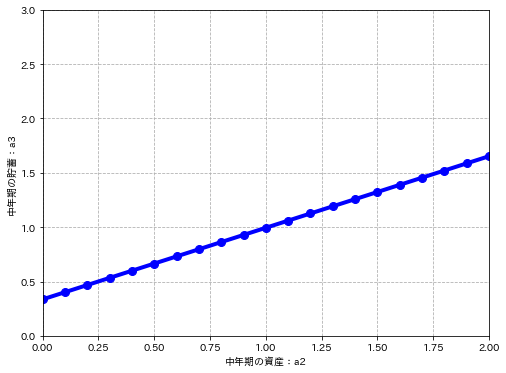

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(params.grid_a,a2_nl,c="b",marker="o",lw=4,ms=8)
ax.set(xlabel="中年期の資産：a2",ylabel="中年期の貯蓄：a3",xlim=(0,2.0),ylim=(0,3.0))
ax.grid(ls="--")
plt.show()

In [8]:
def resid_three_period1(a2,a1,a2_nl,params):

    # オイラー方程式の左辺：若年期の限界効用
    # 予算制約の右辺に基づいて手持ちの現金(cash on hand)を定義
    coh = (1 + params.rent)*a1 + params.y1

    if coh - a2 > 0.0: # 消費が正値
        mu1 = mu_CRRA(coh-a2,params.γ)
    else:
        mu1 = 10000.0
    
    # 中年期の消費：線形補間：毎回係数を計算するのは時間の無駄なので本当は関数の外に出したほうがよい！
    interp1 = interpolate.interp1d(params.grid_a,a2_nl)
    cons = interp1(a1)

    # 中年期の限界効用
    mu2 = mu_CRRA(cons, params.γ)

    # 残差(residual)
    return params.β*(1.0 + params.rent)*(mu2/mu1) - 1.0

In [9]:
# 空っぽの変数を用意：policy functionの器
a1_nl = np.zeros(params.na)

# 実際に各w_{i}のもとで、残差関数がゼロになるようなaを探す
for (w_ind,w_val) in enumerate(params.grid_a):

    # 1変数のfunctionにする
    resid_three_period11 = lambda a: resid_three_period1(a, w_val, a2_nl, params)

    # 0.01はゼロ点を探す際の初期値
    res = optimize.fsolve(resid_three_period11,x0=0.01)
    a1_nl[w_ind] = res[0]

print(a1_nl)

[0.69459877 0.7986382  0.90267764 1.00671708 1.11075652 1.21479595
 1.31883539 1.42287483 1.52691427 1.6309537  1.73499314 1.83903258
 1.94307201 2.04711145 2.15115089 2.25519033 2.35922976 2.4632692
 2.56730864 2.67134808 2.77538751]


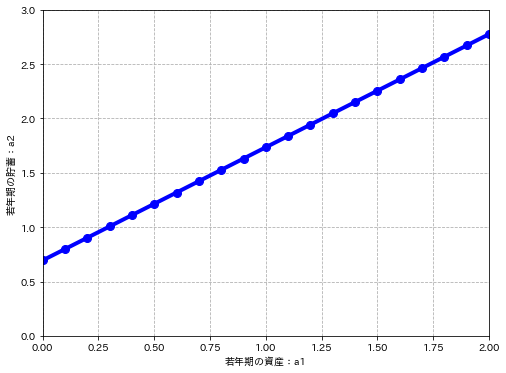

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(params.grid_a,a1_nl,c="b",marker="o",lw=4,ms=8)
ax.set(xlabel="若年期の資産：a1",ylabel="若年期の貯蓄：a2",xlim=(0,2.0),ylim=(0,3.0))
ax.grid(ls="--")
plt.show()